# Importing the essentials

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('exams.csv')

In [4]:
df.shape

(1000, 8)

In [5]:
print(df.isnull().sum())
print(df[df.duplicated()])
df = df.drop_duplicates(keep='first')

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
    gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [8]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")
    print('-'*100)

gender : ['male' 'female']
----------------------------------------------------------------------------------------------------
race/ethnicity : ['group A' 'group D' 'group E' 'group B' 'group C']
----------------------------------------------------------------------------------------------------
parental level of education : ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
----------------------------------------------------------------------------------------------------
lunch : ['standard' 'free/reduced']
----------------------------------------------------------------------------------------------------
test preparation course : ['completed' 'none']
----------------------------------------------------------------------------------------------------
math score : [ 67  40  59  77  78  63  62  93  47  99  80  74  81  69  58  54  23  39
  83  71  44  46  51  53  33  87  65  79  68  57  98 100  60  64  52  36
  56  88  42  76 

In [9]:
df.rename(columns=(lambda x:x.replace(' ',"_")), inplace=True)

In [10]:
df['Total_score'] = df['math_score']+df['writing_score']+df['reading_score']

In [11]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,999.0,66.362362,15.373794,13.0,56.0,66.0,77.0,100.0
reading_score,999.0,68.970971,14.711935,27.0,60.0,70.0,79.0,100.0
writing_score,999.0,67.705706,15.575322,23.0,58.0,68.0,79.0,100.0
Total_score,999.0,203.039039,43.456396,65.0,175.5,202.0,235.0,300.0


# EDA

## Univariant

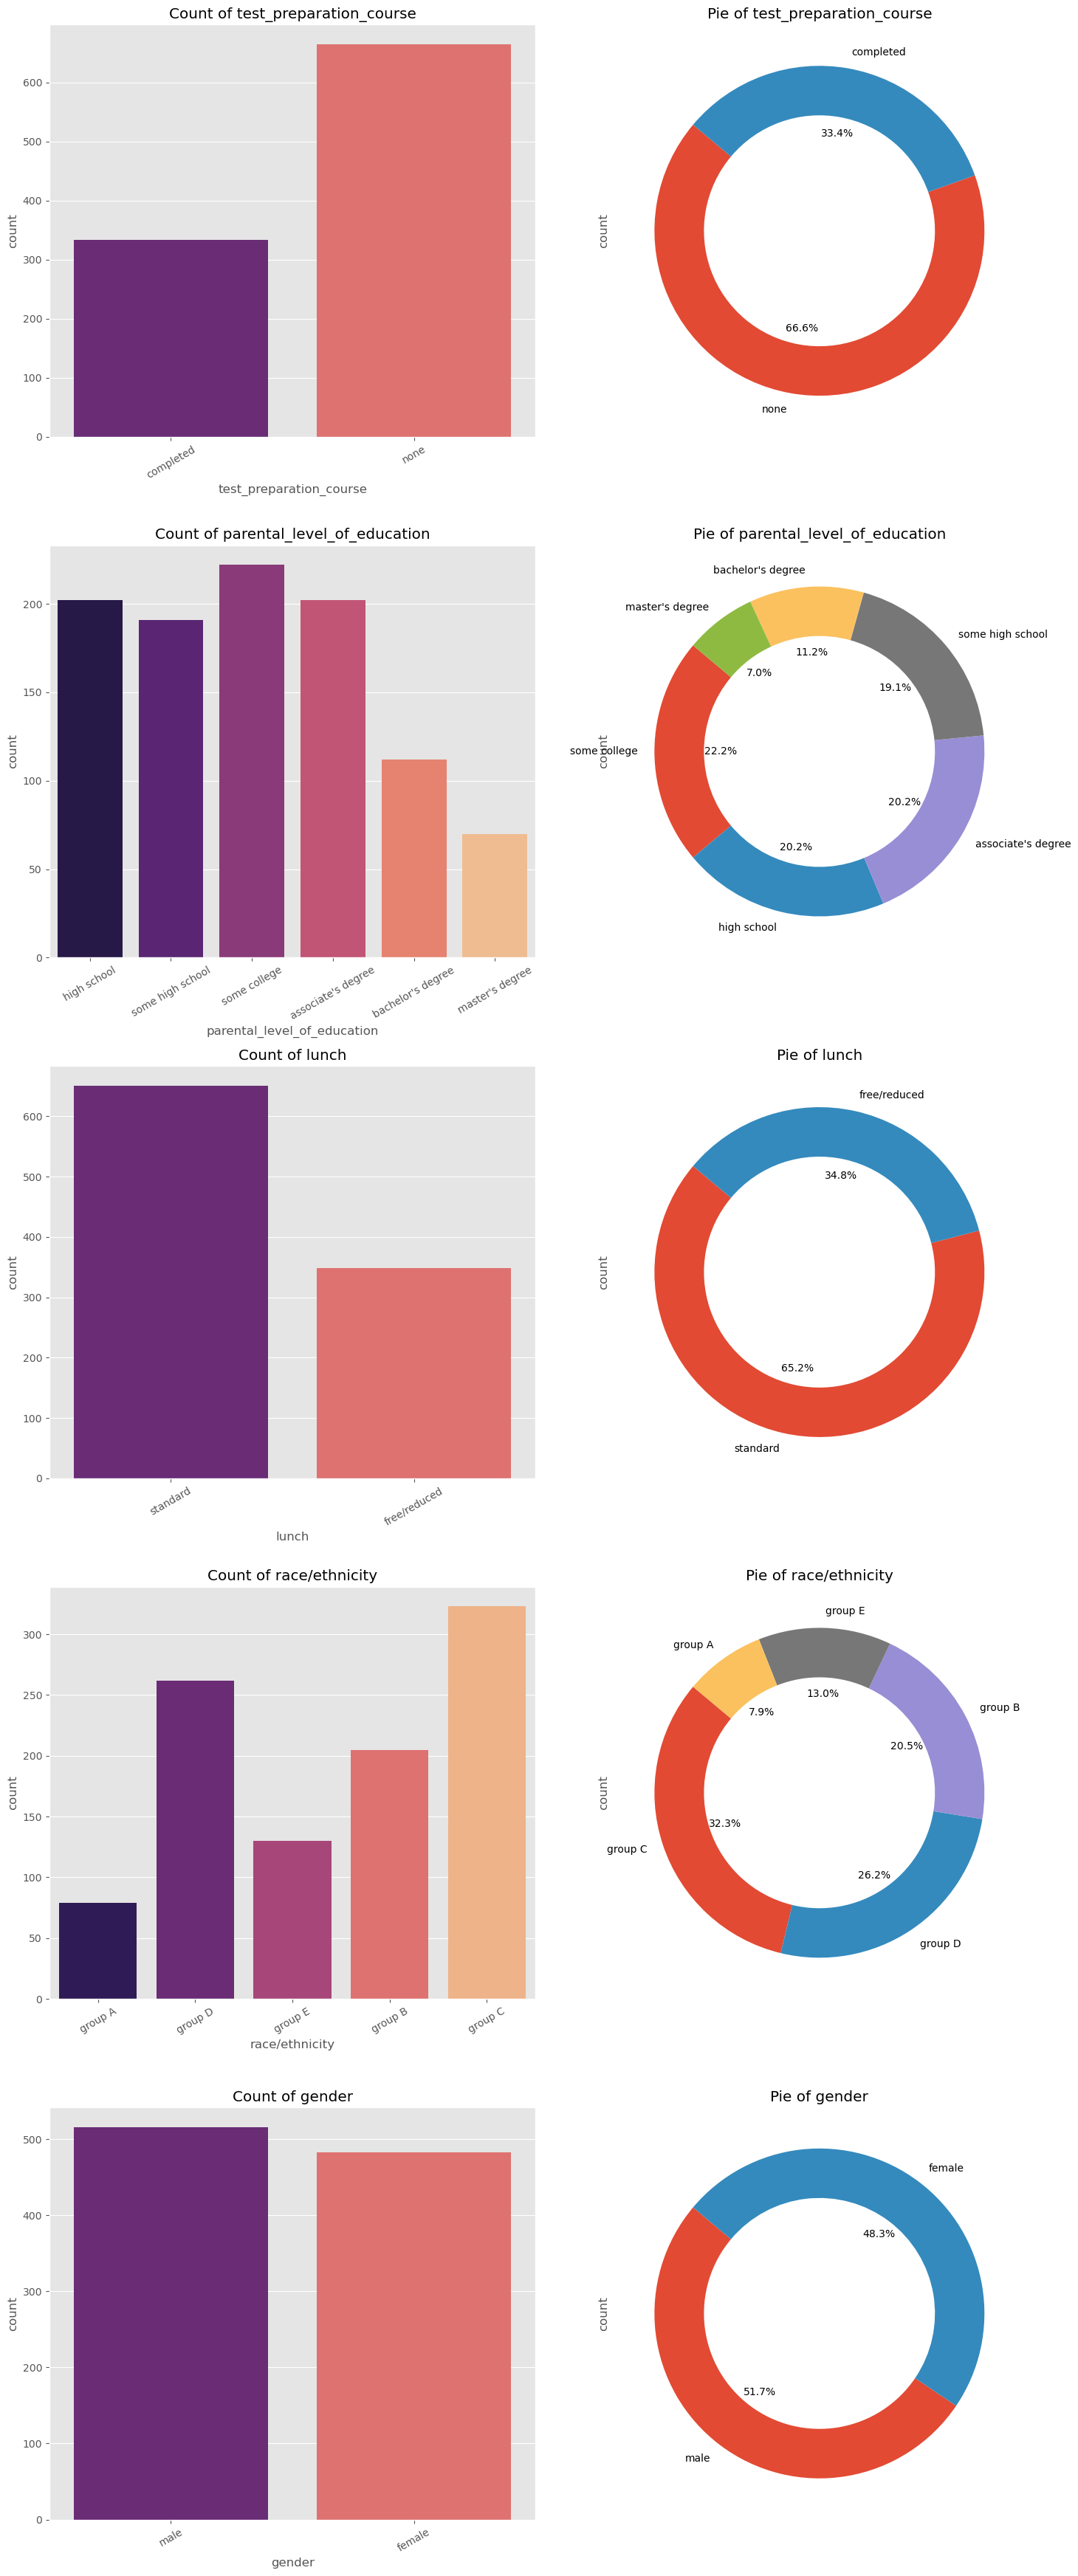

In [44]:
uni1 = [
    'test_preparation_course','parental_level_of_education', 'lunch','race/ethnicity','gender'
]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 35))

for i,item in enumerate(uni1):

    sns.countplot(x =item, palette='magma', data = df , ax = axes[i,0]).set_title(f'Count of {item}')
    axes[i, 0].tick_params(axis='x', rotation=30)

    df[item].value_counts().plot.pie(autopct = "%1.1f%%" , wedgeprops=dict(width=0.3), startangle=140, ax = axes[i,1]).set_title(f'Pie of {item}')
plt.tight_layout()
plt.show()

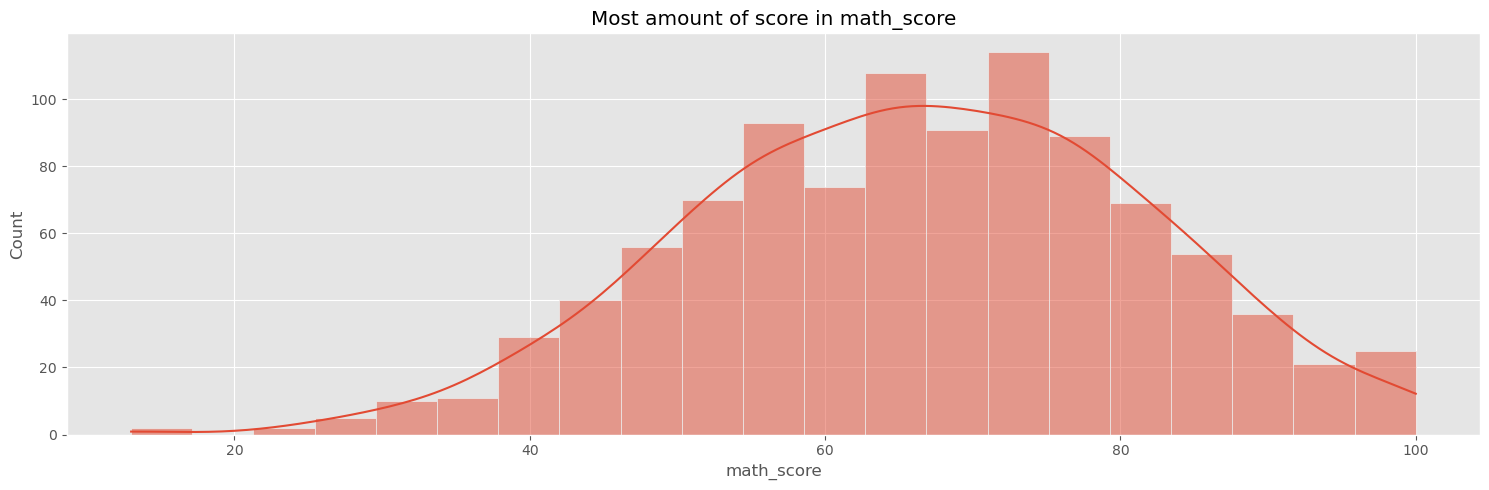

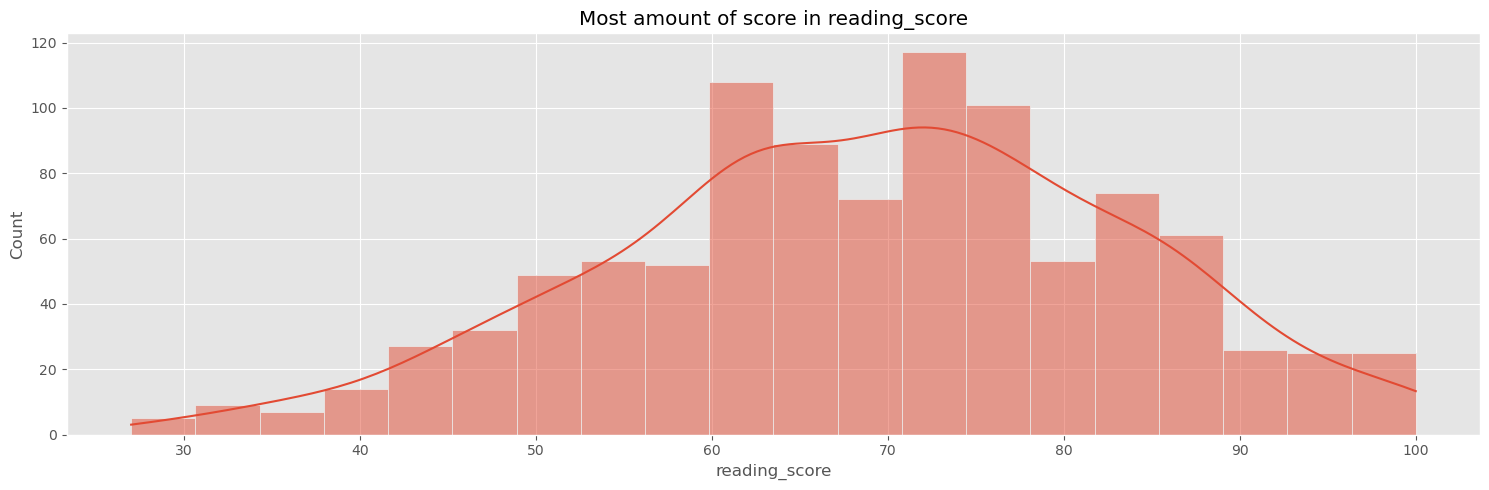

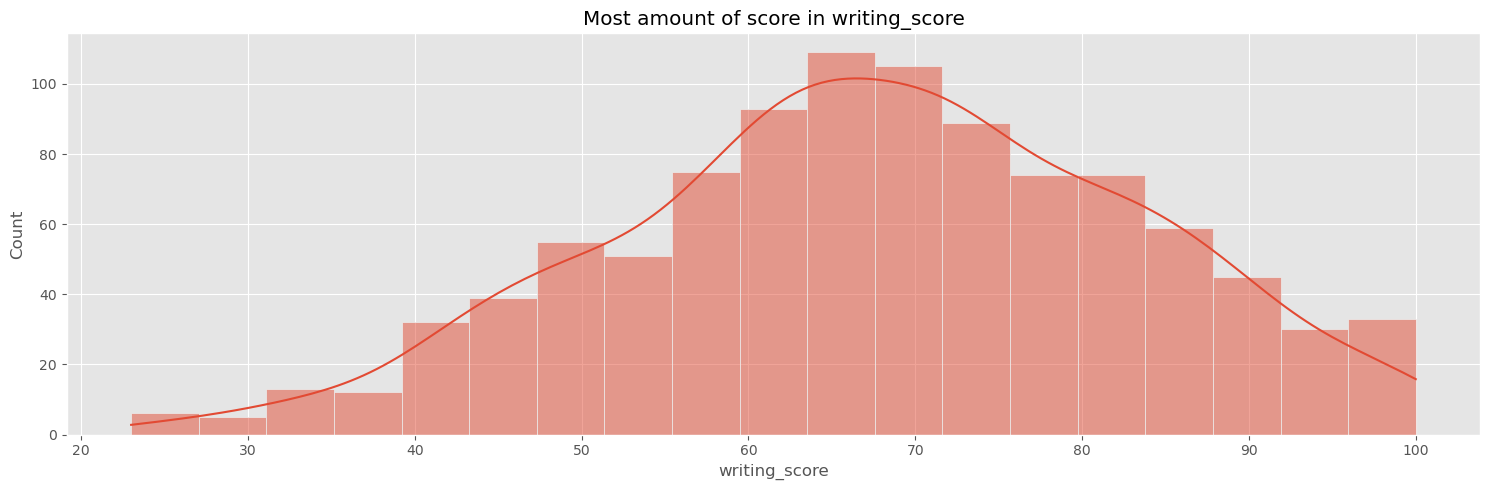

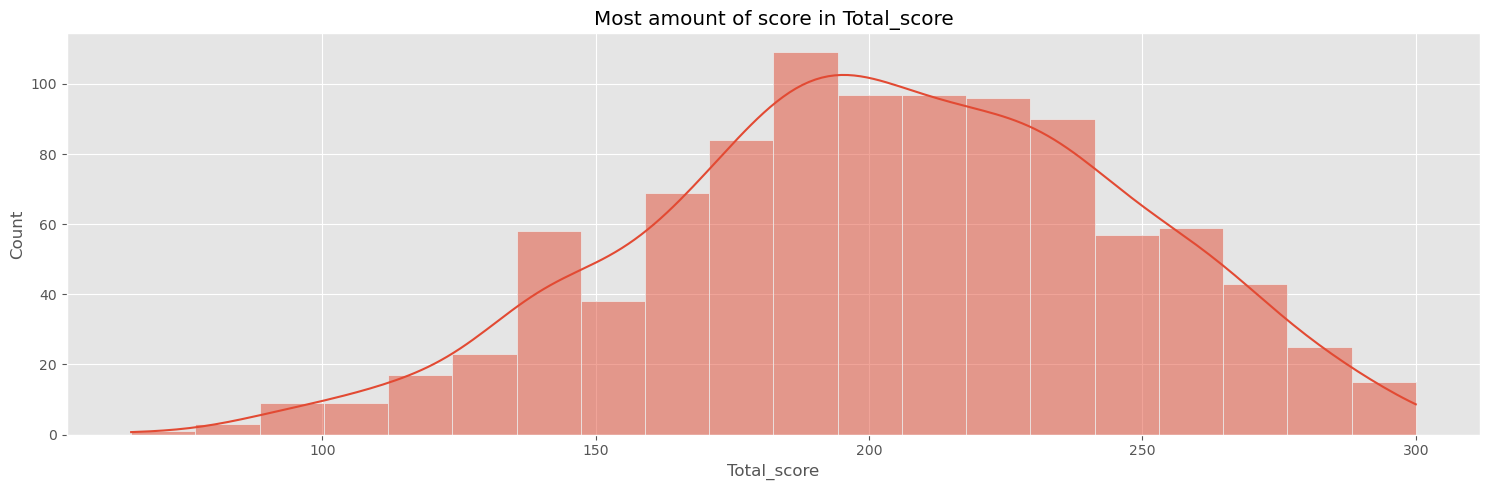

In [22]:
uni2 = [
    'math_score','reading_score', 'writing_score', 'Total_score'
]
for i in uni2:
    plt.figure(figsize=(15,5))
    sns.histplot(x =i, data = df , kde = True).set_title(f'Most amount of score in {i}')
    plt.tight_layout()
    plt.show()